<a href="https://colab.research.google.com/github/GalinaZh/Alg2020_2021/blob/main/Alg_8_2020.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import sympy
from sympy import  Point, Line, Plane, Point3D, Segment, Ray, latex
import matplotlib.pyplot as plt

# Занятие 8
# Алгебра
https://docs.sympy.org/latest/search.html?q=geometry

## Проекции, сегменты, лучи в модуле Geometry

### projection(other)

Проекция точки или отрезка на прямую, а также точки на плоскость

###### Параметры:

        other : точка или отрезок

возвращает объект, соответствующий типу other
        
Проекция отрезка находится так: для каждой из двух точек, определяющих отрезок находится ближайшая точка на прямой, на которую стоится проекция, потом по найденным точкам строится отрезок.
### projection_line
проекция прямой на плоскость.
### Segment 
отрезок,
параметры: 
###### p1 и p2 
точки
###### Свойства:
###### length 
длина (число или выражение)
###### midpoint 
середина отрезка - точка
###### contains(other)
содержится ли other в сегменте
###### perpendicular_bisector(p=None) 
серединный перпендикуляр отрезка, причем
если точка p не задана, или не лежит на серединном перпендикуляре, то возвращается перпендикулярная прямая, проходящая через середину отрезка иначе возвращается отрезок,
соединяющий точку p и середину отрезка или сама точка p, если она является серединой отрезка
### Ray
луч - полупрямая, имеющая начальную точку и направление,
###### параметры
###### р1 
начальная точка, 
###### р2
точка или угол в радианах, р2 определяет направление луча.
###### свойства: 
###### source 
точка, из которой луч выходит 
###### xdirection 
направление по оси ОХ, положительная (отрицалеотная) бесконечность, если луч направлен в положительную (отрицательную) сторону оси ОХ; 0 - если перпендикулярен оси ОХ. 
###### ydirection  zdirection - аналогично
### Линейные объекты 2D
Базовый класс всех линейных объектов (прямых, лучей, отрезков) в двумерном евклидовом пространстве
###### Свойства:
###### p1, p2 
точки
###### coefficients
коэффициенты уравнения линейного объекта
###### slope 
угол наклона (для вертикальных - бесконечность), число или выражение
###### bounds 
tuple (xmin, ymin, xmax, ymax) - границы прямоугольника, содержащего данный геометрический объект
###### perpendicular_line(p) 
прямая, перпендикулярная данному геомерическому объекту, проходящая через точку p
### Пример 1.
Даны точки: $A(1, 2, 3)$,  $B(-5, 1, 7)$, $С(-2, 3, 5)$, $K(8, 7, 3)$, $M(6, -3, 1)$.

Найти проекцию точки $К$ на прямую $АВ$ и на плоскость $АВС$.

Построить проекцию прямой $КМ$ на плоскость $АВС$.

In [ ]:
A = Point(1, 2, 3)
B = Point(-5, 1, 7)
C = Point(-2, 3, 5)
K = Point(8, 7, 3) 
M = Point(6, -3, 1) 
AB = Line(A, B)
KM = Line(K, M)
ABC = Plane(A, B)
display(AB.projection(K), ABC.projection(K), ABC.projection_line(KM))

Point3D(335/53, 153/53, -29/53)

Point3D(6, 37/5, 29/5)

Line3D(Point3D(6, 37/5, 29/5), Point3D(46/15, -181/75, 383/75))

### Пример 2

Создадим отрезок КМ_seg и найдем его проекцию на прямую АВ 

In [ ]:
KM_seg = Segment(K, M)
display(AB.projection(KM_seg))

Segment3D(Point3D(335/53, 153/53, -29/53), Point3D(251/53, 139/53, 27/53))

### Пример 3
Найдем середину отрезка KM_seg, построим серединный перпендикуляр от точки с координатами (x, y, z), от средней точки и от точки (17, 0, 2).

In [ ]:
mid = KM_seg.midpoint
print('KM midpoint')
display(mid)
print('Bisectors:')
from sympy.abc import x, y, z
for p in (mid, Point(x, y, z), Point(17, 0, 2)):
    display(KM_seg.perpendicular_bisector(p))

KM midpoint


Point3D(7, 2, 2)

Bisectors:


Point3D(7, 2, 2)

Line3D(Point3D(17, 0, 2), Point3D(7, 2, 2))

Segment3D(Point3D(17, 0, 2), Point3D(7, 2, 2))

### Пример 4
Проверим, какие точки из Примера 1 лежат на  $KM$. 

In [ ]:
for p in (A, B, C, K, M):
    if KM.contains(p):
        print(p)        

Point3D(8, 7, 3)
Point3D(6, -3, 1)


### Пример 5
Угол между лучами AB_ray и KM_ray

In [ ]:
AB_ray = Ray(A, B)
KM_ray = Ray(K, M)
AB_ray.angle_between(KM_ray)

acos(7*sqrt(159)/477)

### Пример 6
Создадим точки на плоскости:
$R(-2, 3)$, $S(4, 0)$, $Q(1, -2)$ 

In [ ]:
R = Point(-2, 3)
S = Point(4, 0)
Q = Point(1, -2) 
O = Point(0, 0)

Построим отрезок RS_seg, луч SQ_ray и узнаем, какие у них точки, коэффициенты наклона, границы. 

In [ ]:
RS_seg = Segment(R, S)
QS_ray = Ray(Q, S)
display(((RS_seg.p1, RS_seg.p2), RS_seg.slope, RS_seg.bounds))
display((QS_ray.source, QS_ray.slope, QS_ray.bounds))

((Point2D(-2, 3), Point2D(4, 0)), -1/2, (-2, 0, 4, 3))

(Point2D(1, -2), 2/3, (1, -2, 4, 0))

Построим перпендикулярные к RS_seg и QS_ray линии, проходящие через начало координат.

Составим уравнения этих прямых, найдем коэффициент наклона каждой из них.

'RS'

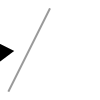

-6*x + 3*y

2

'QS'

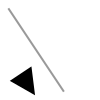

-3*x - 2*y

-3/2

In [ ]:
RS_perp = RS_seg.perpendicular_line(O)
display('RS', RS_perp, RS_perp.equation(x='x', y='y'), RS_perp.slope)
QS_perp = QS_ray.perpendicular_line(O)
display('QS', QS_perp,QS_perp.equation(x='x', y='y'), QS_perp.slope)

### Пример 7
Даны точки: $A(1, -2)$,  $B(-2, -3)$, 
$F(2, -1)$.
Построить на графике прямую $BF$, отрезок $АВ$, отметить точку $F$ и подписать именами точки.

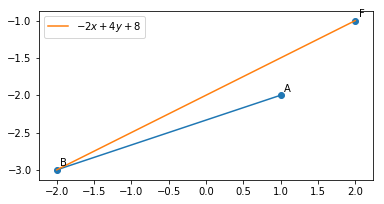

In [ ]:
A = Point(1, -2)
B = Point(-2, -3)
F = Point(2, -1) 
BF = Line(B, F)
point_dict = {A: 'A', B: 'B', F: 'F'}
AB_seg = Segment(A, B)
X = []
Y = []
ax = plt.gca()
ax.set_aspect('equal')
for point in (point_dict.keys()): 
    x_coord = point.x
    y_coord = point.y
    X.append(x_coord)
    Y.append(y_coord)
    ax.annotate(point_dict[point],
            xy=(x_coord, y_coord), xycoords='data',
            xytext=(x_coord + 0.05, y_coord + 0.05), textcoords='data') 
ax.plot([A.x, B.x], [A.y, B.y])
ax.plot([BF.p1.x, BF.p2.x], [BF.p1.y, BF.p2.y], label = latex(BF.equation(x='x', y='y'), mode='inline'))
ax.legend()
ax.scatter(X, Y)